In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
from scipy.stats import linregress

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [3]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [4]:
# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
427 427


In [5]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
403,United States,2017,6.991759,10.905420,0.921003,68.400002,0.868497,0.194489,0.681191,0.826555,0.692602,1.552104,1.880688,0.268986,North America
404,United States,2018,6.882685,10.927395,0.903856,68.300003,0.824607,0.113378,0.709928,0.815383,0.758395,1.482865,2.119374,0.307928,North America
405,United States,2019,6.943701,10.944225,0.916691,68.199997,0.836139,0.141645,0.706716,0.814985,NaN,NaN,1.789670,0.257740,North America


#### Filter data set to only include countries that have data for all 3 years

In [6]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if length matches length of countries lists
Final_df["Country Name"].nunique()


129
153


129

#### Final Data sets

In [7]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
67,Bolivia,2015,5.834329,8.770963,0.828706,62.700001,0.883625,-0.021084,0.862374,0.785768,-0.136578,-0.843813,1.857556,0.318384,0.467,Latin America & Caribbean
72,Botswana,2015,3.761965,9.658858,0.815656,56.799999,0.857169,-0.119637,0.860293,0.746204,0.741217,0.597275,2.291609,0.609152,0.533,Sub-Saharan Africa
79,Brazil,2015,6.546897,9.602870,0.906693,65.800003,0.798935,-0.022317,0.771339,0.755194,0.063697,-0.230077,2.257859,0.344875,0.513,Latin America & Caribbean
98,Chile,2015,6.532750,10.010426,0.827142,69.599998,0.768881,0.036379,0.811511,0.803025,0.718964,1.263847,1.938147,0.296682,0.477,Latin America & Caribbean
107,Colombia,2015,6.387572,9.481480,0.889900,66.800003,0.790898,-0.102062,0.842899,0.839295,-0.532610,-0.034323,2.246151,0.351644,0.511,Latin America & Caribbean


In [8]:
#Data set with the countries that have data for all 3 years 
len(Final_df)

387

In [9]:
#create team df

sm_df = Final_df.dropna()



In [10]:
#function linear regression
def linear_regression(x,y):
    print(f"The r value is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, color = 'mediumslateblue')
    plt.plot(x,regress_values,"r-", color = "palevioletred")
    return line_eq  
# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="palevioletred")

The r value is : 0.75


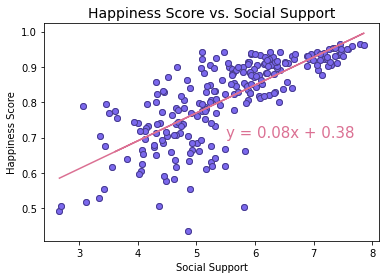

In [11]:
x = sm_df["Happiness Score"]
y = sm_df["Social Support"]
lr = linear_regression(x,y)

annotate(lr, 5.5, .7)

plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Social Support', fontsize= 14)
plt.scatter(x, y, color = 'mediumslateblue', edgecolor = 'darkslateblue')


socialsupportr =  round(st.pearsonr(x, y)[0],2)





The r value is : 0.77


Text(0.5, 1.0, 'Happiness Score vs. GDP per Capita(ln)')

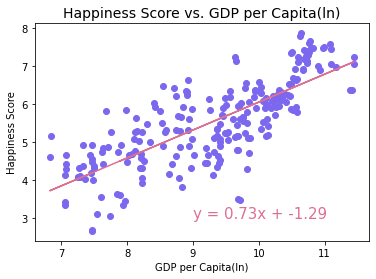

In [12]:
#GDP

y = sm_df["Happiness Score"]
x = sm_df["GDP per Capita(ln)"]
lr = linear_regression(x,y)

annotate(lr, 9, 3)

plt.xlabel("GDP per Capita(ln)")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. GDP per Capita(ln)', fontsize= 14)


The r value is : 0.75


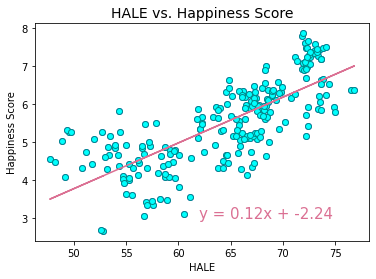

In [13]:
#HALE 

y = sm_df["Happiness Score"]
x = sm_df["HALE"]
lr = linear_regression(x,y)

annotate(lr, 62, 3)

plt.xlabel("HALE")
plt.ylabel("Happiness Score")
plt.title('HALE vs. Happiness Score', fontsize= 14)
plt.scatter(x, y, color = 'cyan', edgecolor = 'darkcyan')


HALEr =  round(st.pearsonr(x, y)[0],2)


The r value is : 0.48


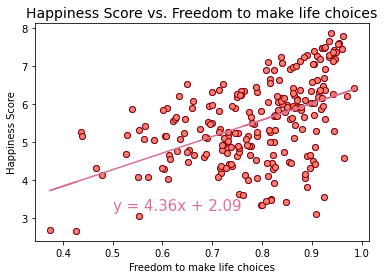

In [14]:
#Freedom to make life choices

y = sm_df["Happiness Score"]
x = sm_df["Freedom to make life choices"]
lr = linear_regression(x,y)

annotate(lr, .5, 3.2)

plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Freedom to make life choices', fontsize= 14)
plt.scatter(x, y, color = 'salmon', edgecolor = 'darkred')

LifeChoicesr =  round(st.pearsonr(x, y)[0],2)


The r value is : 0.1


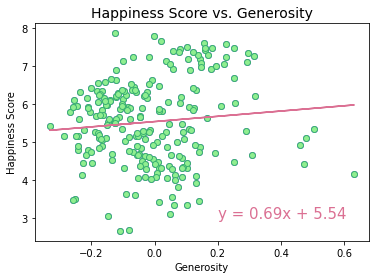

In [15]:
#Generosity

y = sm_df["Happiness Score"]
x = sm_df["Generosity"]
lr = linear_regression(x,y)

annotate(lr, .2, 3)

plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Generosity', fontsize= 14)
plt.scatter(x, y, color = 'lightgreen', edgecolor = 'mediumseagreen')

Generosityr =  round(st.pearsonr(x, y)[0],2)


The r value is : -0.48


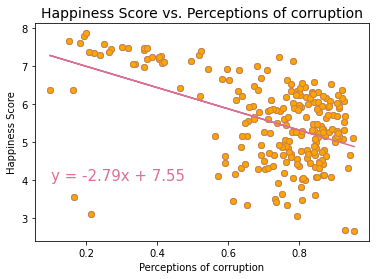

In [16]:
#Perceptions of corruption

y = sm_df["Happiness Score"]
x = sm_df["Perceptions of corruption"]
lr = linear_regression(x,y)

annotate(lr, .1, 4)

plt.xlabel("Perceptions of corruption")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Perceptions of corruption', fontsize= 14)
plt.scatter(x, y, color = 'orange', edgecolor = 'peru')
Corruptionr =  round(st.pearsonr(x, y)[0],2)


The r value is : 0.69


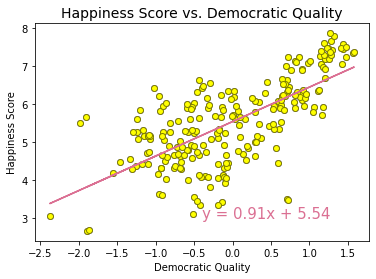

In [17]:
#Democratic Quality

y = sm_df["Happiness Score"]
x = sm_df["Democratic Quality"]
lr = linear_regression(x,y)

annotate(lr, -.4, 3)

plt.xlabel("Democratic Quality")
plt.ylabel("Happiness Score")
plt.title('Happiness Score vs. Democratic Quality', fontsize= 14)
plt.scatter(x, y, color = 'yellow', edgecolor = 'olive')
DemQualityr =  round(st.pearsonr(x, y)[0],2)


In [18]:
#Dictionary of R Values
rsquared_dict = {
                "Social Support" : socialsupportr,
                "HALE" : HALEr,
                "Life Choice Freedom" : LifeChoicesr,
                "Generosity" : Generosityr,
                "Perceptions of Corruption": Corruptionr,
                "Democratic Quality": DemQualityr,
               
                
}

rsquared_df = pd.DataFrame(rsquared_dict, index=["R-Values"])


transposedr = rsquared_df.transpose()



In [19]:
transposedr['R-Values']

Social Support               0.75
HALE                         0.75
Life Choice Freedom          0.48
Generosity                   0.10
Perceptions of Corruption   -0.48
Democratic Quality           0.69
Name: R-Values, dtype: float64

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 9 Text major ticklabel objects>)

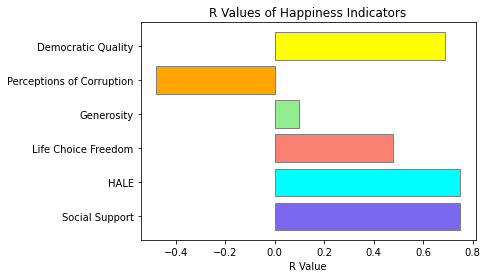

In [21]:
Indicators = ['Social Support','HALE','Life Choice Freedom','Generosity', 'Perceptions of Corruption', 'Democratic Quality']

rvalues = transposedr['R-Values']

x_axis = np.arange(len(rvalues))

# Create a bar chart based upon the above data
plt.barh(x_axis, rvalues, align="center", color=['mediumslateblue', 'cyan', 'salmon', 'lightgreen', 'orange', 'yellow'], edgecolor='gray')

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, Indicators, rotation ="horizontal")

plt.title("R Values of Happiness Indicators")
plt.xlabel("R Value")

plt.xticks(rotation=0)





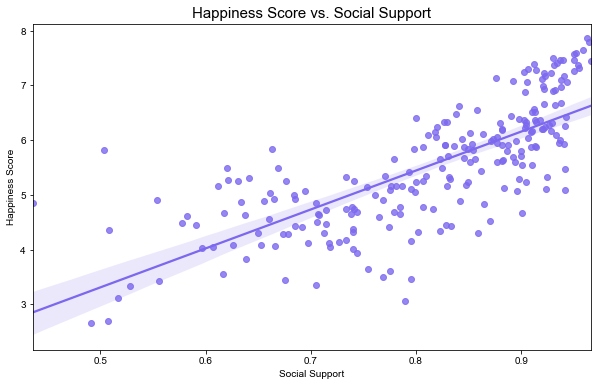

In [22]:
# use the function regplot to make a scatterplot
plt.figure(figsize=(10,6))
sns.regplot(y=sm_df["Happiness Score"], x=sm_df["Social Support"], color='mediumslateblue')
plt.title("Happiness Score vs. Social Support", size=15)
sns.set_style("dark")

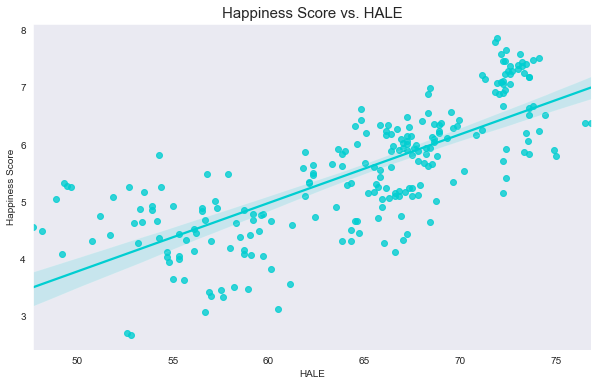

In [23]:
# use the function regplot to make a scatterplot
plt.figure(figsize=(10,6))
sns.regplot(y=sm_df["Happiness Score"], x=sm_df["HALE"], color='darkturquoise')
plt.title("Happiness Score vs. HALE", size=15)
sns.set_style("dark")


In [24]:
#dataframe for country name and happiness

happiness_ranking = sm_df.groupby(['Country Name'])['Happiness Score'].mean()

happiness_ranking_df = pd.DataFrame(happiness_ranking)



In [25]:
#add columns for indicators

social_support_ranking = sm_df.groupby(['Country Name'])['Social Support'].mean()

HALE_ranking = sm_df.groupby(['Country Name'])['HALE'].mean()

LCF_ranking = sm_df.groupby(['Country Name'])['Freedom to make life choices'].mean() 

DQ_ranking = sm_df.groupby(['Country Name'])['Democratic Quality'].mean() 


In [26]:
happiness_ranking_df.sort_values(by=['Happiness Score'], inplace=True, ascending=False)
happiness_ranking_df['Social Support'] = social_support_ranking 
happiness_ranking_df['HALE'] = HALE_ranking 
happiness_ranking_df['Life Choice Freedom'] = LCF_ranking 
happiness_ranking_df['Democratic Quality'] = DQ_ranking

happiness_ranking_df =happiness_ranking_df[["Happiness Score", "Social Support", "Life Choice Freedom", "Democratic Quality", "HALE"]]

top_20 = happiness_ranking_df.head(20)

top_20


,Happiness Score,Social Support,Life Choice Freedom,Democratic Quality,HALE
Country Name,,,,,
Finland,7.823179,0.962991,0.950003,1.292768,71.850002
Denmark,7.621244,0.955159,0.945427,1.238656,72.250000
Norway,7.511503,0.958045,0.956723,1.437203,73.149998
Switzerland,7.491090,0.939976,0.925706,1.443328,73.950001
Netherlands,7.461031,0.937972,0.920152,1.238758,72.250000
New Zealand,7.348734,0.954392,0.945790,1.577230,73.099998
Austria,7.344865,0.908943,0.897071,1.171896,72.849998
Sweden,7.330798,0.922348,0.938153,1.271481,72.549999
Canada,7.295182,0.928234,0.945464,1.273551,73.500000


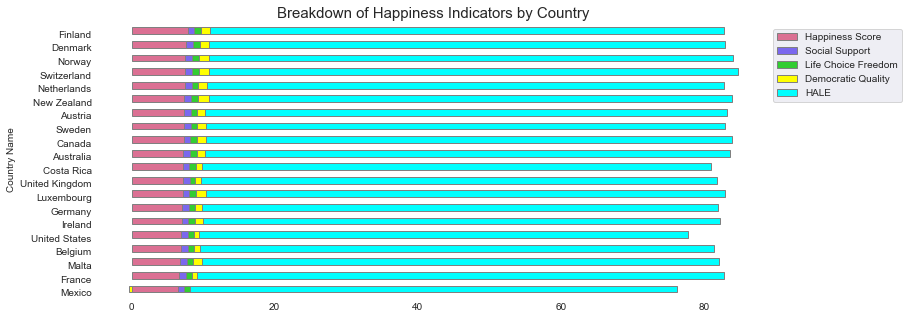

In [30]:
# Create a bar chart based upon the above data


ax = top_20.sort_values("Happiness Score", ascending=True).plot.barh(stacked=True, align='edge', width=.5, color=['palevioletred', 'mediumslateblue', 'limegreen', 'yellow', 'cyan'], edgecolor='gray')

ax.set_facecolor("white")
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Breakdown of Happiness Indicators by Country", size =15)
plt.rcParams["figure.figsize"] = (12,5)

